In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

#Datasets generation
from sklearn.datasets import make_circles, make_blobs, make_classification, make_moons, make_gaussian_quantiles

#Classification models
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier as RFc
from sklearn.tree import DecisionTreeClassifier as DTc
from sklearn.svm import SVC as SVMc
from sklearn.neural_network import MLPClassifier as MLPc
from sklearn.model_selection import train_test_split

#GridSearch
from sklearn.model_selection import GridSearchCV

#Model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_classifier_boundary(model,x,h = .05): #kindly provided in class
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = x[:, 0].min()-.2, x[:, 0].max()+.2
    y_min, y_max = x[:, 1].min()-.2, x[:, 1].max()+.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))

In [3]:
def Test_models(x, y):
    models = [LR(), LDA(), QDA(), RFc(), DTc(), SVMc(kernel='rbf', probability=True), SVMc(kernel='linear', probability=True), 
              SVMc(kernel='poly', probability=True), MLPc(activation='relu'), MLPc(activation='tanh')]
    modls = ['LR','LDA','QDA','RFc','DTc','SVMc_rbf' ,'SVMc_lin','SVMc_poly','MLPc_relu','MLPc_tanh']
    
    cmap = colors.ListedColormap(['blue','orange'])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify = y)

    grid_params_DTc = {'criterion': ['gini', 'entropy'],
        'max_depth': range(1, 10),
        'min_samples_split': range(1, 10),
        'min_samples_leaf': range(1, 5) }    
    grid_params_RFc = {"n_estimators": [10, 50, 100, 200],
             "criterion": ['gini', 'entropy'],
             "min_samples_split": [2, 5, 10, 20],
             "min_samples_leaf": [1, 2 , 5 , 10],
             "min_impurity_decrease": [0.0, 1.0, 2.0]}
    grid_params_SVMc = {'C':[0.001,0.005,0.01,0.05, 0.1,0.5, 1, 5, 10]}
    grid_params_MLPc = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
            'batch_size':[100, 50, 25]}
    
    Acc_train = []
    F1_train = []
    Auc_train =  []

    Acc_test = []
    F1_test = []
    Auc_test = []

    T_time = []
    
    fig = plt.figure(figsize=(15,15))
    for i in range(len(models)):
        mod = models[i]
        if i == 4:
            grid_mod = GridSearchCV(DTc(), grid_params_DTc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 3:
            grid_mod = GridSearchCV(RFc(random_state=42), grid_params_RFc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 5:
            grid_mod = GridSearchCV(SVMc(kernel='rbf', probability=True), grid_params_SVMc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 6:
            grid_mod = GridSearchCV(SVMc(kernel='linear', probability=True), grid_params_SVMc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_    
        elif i == 7:
            grid_mod = GridSearchCV(SVMc(kernel='poly', probability=True), grid_params_SVMc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 8:
            grid_mod = GridSearchCV(MLPc(activation='relu'), grid_params_MLPc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 9:
            grid_mod = GridSearchCV(MLPc(activation='tanh'), grid_params_MLPc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')    
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        
        else:
            mod = models[i]
        start = time.time()
        mod.fit(x_train, y_train)
        stop = time.time()

        print(mod)
        #print('Accuracy (train):', accuracy_score(y_train, mod.predict(x_train)))
        Acc_train.append(accuracy_score(y_train, mod.predict(x_train)))
        #print('F1 (train):', f1_score(y_train, mod.predict(x_train)))
        F1_train.append(f1_score(y_train, mod.predict(x_train)))
        #print('AUC (train):', roc_auc_score(y_train, mod.predict_proba(x_train)[:, 1]))
        Auc_train.append(roc_auc_score(y_train, mod.predict_proba(x_train)[:, 1]))

        #print('Accuracy (test):', accuracy_score(y_test, mod.predict(x_test)))
        Acc_test.append(accuracy_score(y_test, mod.predict(x_test)))
        #print('F1 (test):', f1_score(y_test, mod.predict(x_test)))
        F1_test.append(f1_score(y_test, mod.predict(x_test)))
        #print('AUC (test):', roc_auc_score(y_test, mod.predict_proba(x_test)[:, 1]))
        Auc_test.append(roc_auc_score(y_test, mod.predict_proba(x_test)[:, 1]))

        print(f"Training time: {stop - start}s")
        T_time.append(stop-start)
        print('\n')

        ax = fig.add_subplot(4, 4, i+1)
        plot_classifier_boundary(mod,x)
        ax.scatter(x[:,0],x[:,1],color=cmap(y))
        ax.set_title(modls[i], fontsize = 13)
        ax.set_xlabel('$x1$')
        ax.set_ylabel('$x2$')
    
    Metrics = [Acc_train, F1_train, Auc_train, T_time, Acc_test, F1_test, Auc_test]
    Labels = ['Accuracy score', 'F1', 'AUC', 'Training time']
    for i in range(4):
        if i<3:   
            ax = fig.add_subplot(4, 4, i+13)
            ax.plot([*range(10)], Metrics[i], marker='o', alpha=0.5)
            ax.plot([*range(10)], Metrics[i+4], marker='*', alpha=0.5)
            ax.set_ylim((-0.1, 1.1))
            ax.set_ylabel(Labels[i])
            ax.set_xticks([*range(10)])
            ax.set_xticklabels(modls, rotation=90)
            ax.legend(['Train', 'Test'])
        else:
            ax = fig.add_subplot(4, 4, i+13) 
            ax.barh(modls, Metrics[i])
            ax.set_xlabel(Labels[i])
    
    plt.tight_layout()

In [4]:
cmap = colors.ListedColormap(['blue','orange'])

LogisticRegression()
Training time: 0.0049860477447509766s


LinearDiscriminantAnalysis()
Training time: 0.0019943714141845703s


QuadraticDiscriminantAnalysis()
Training time: 0.0009975433349609375s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(n_estimators=10, random_state=42)
Training time: 0.010970830917358398s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=1)
Training time: 0.0009980201721191406s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, probability=True)
Training time: 0.03992748260498047s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.01795196533203125s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.005, kernel='poly', probability=True)
Training time: 0.002991914749145508s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(ba

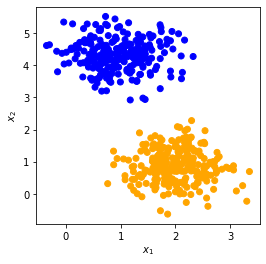

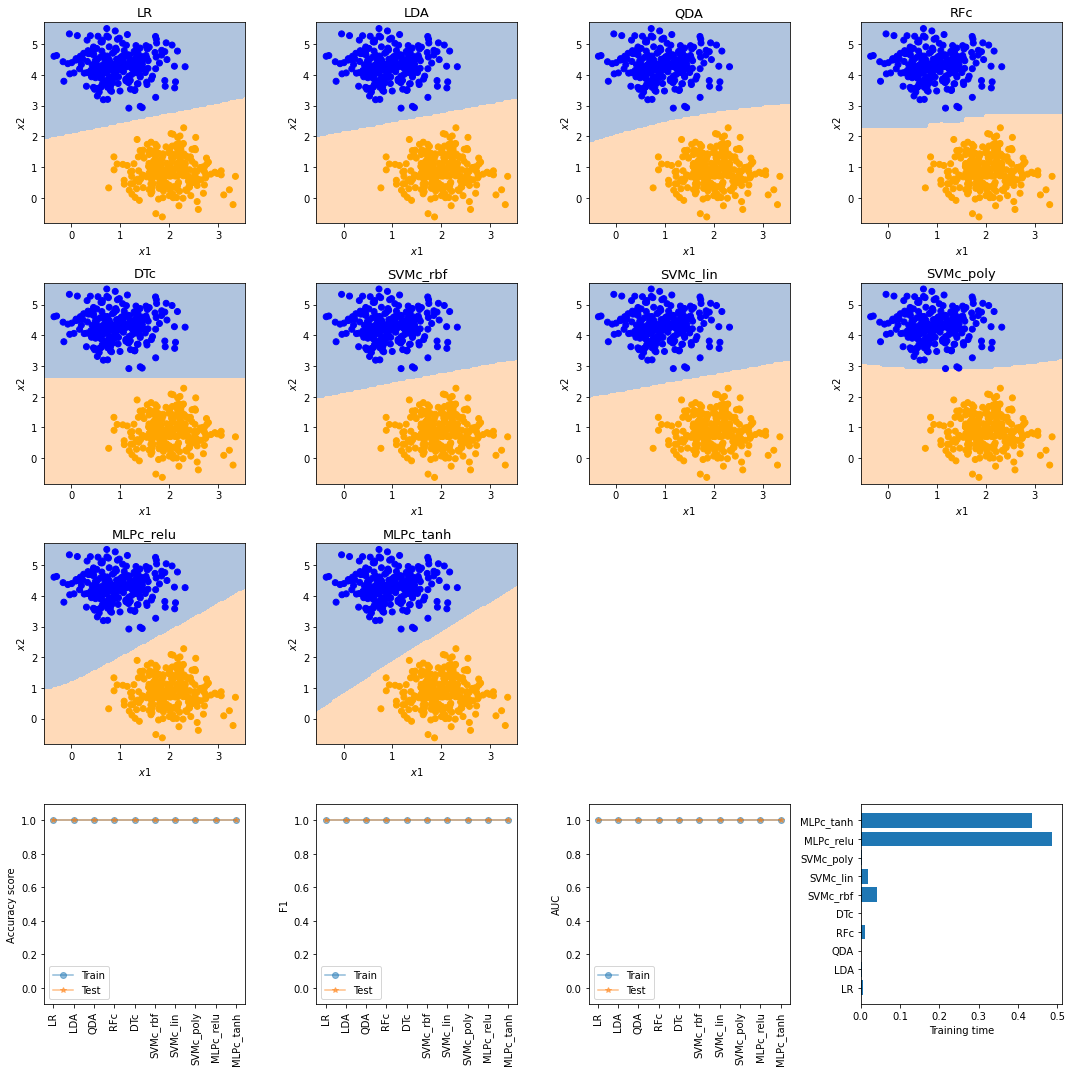

In [5]:
x, y = make_blobs(n_samples=500, centers=2, n_features=2, 
                  cluster_std=0.5, random_state=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.006981372833251953s


LinearDiscriminantAnalysis()
Training time: 0.0009970664978027344s


QuadraticDiscriminantAnalysis()
Training time: 0.0009479522705078125s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=2, min_samples_split=20,
                       n_estimators=50, random_state=42)
Training time: 0.05086326599121094s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=1)
Training time: 0.000997781753540039s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, probability=True)
Training time: 0.03792881965637207s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.005, kernel='linear', probability=True)
Training time: 0.008976221084594727s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='poly', probability=True)
Training time: 0.0109710693359375s


Fitting 5 folds for e

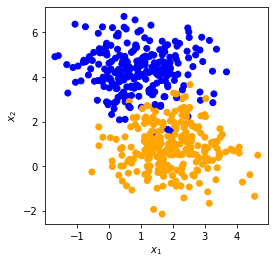

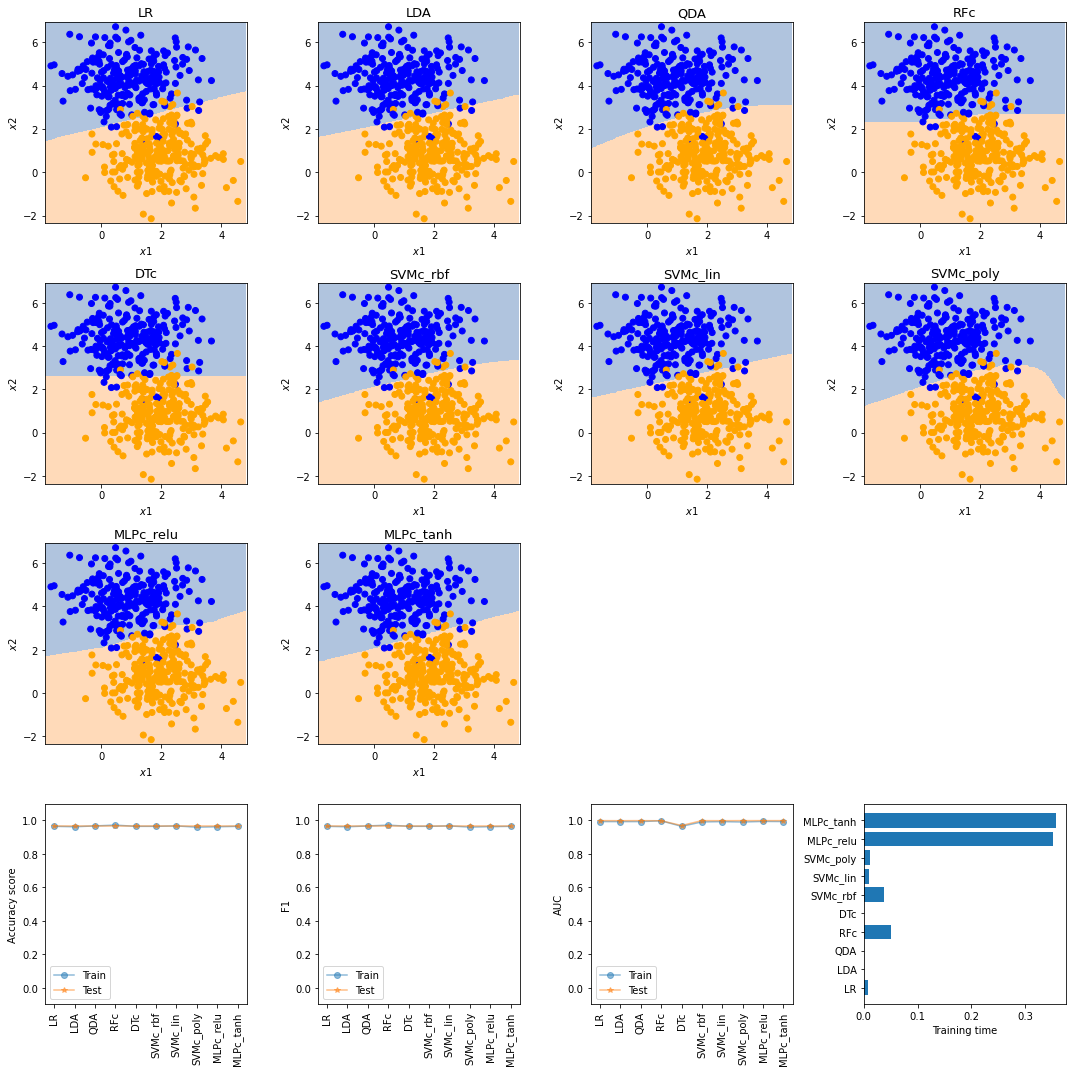

In [6]:
x, y = make_blobs(n_samples=500, centers=2, n_features=2, 
                  cluster_std=1, random_state=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.0s


LinearDiscriminantAnalysis()
Training time: 0.000997304916381836s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(n_estimators=50, random_state=42)
Training time: 0.050864219665527344s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=1)
Training time: 0.0009980201721191406s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, probability=True)
Training time: 0.0009980201721191406s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.000997304916381836s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='poly', probability=True)
Training time: 0.0s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(alpha=0.05, batch_size=25, hidden_layer_sizes=(50, 100,

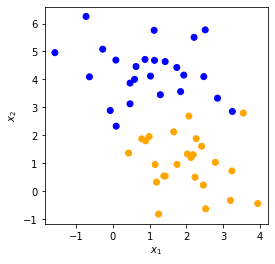

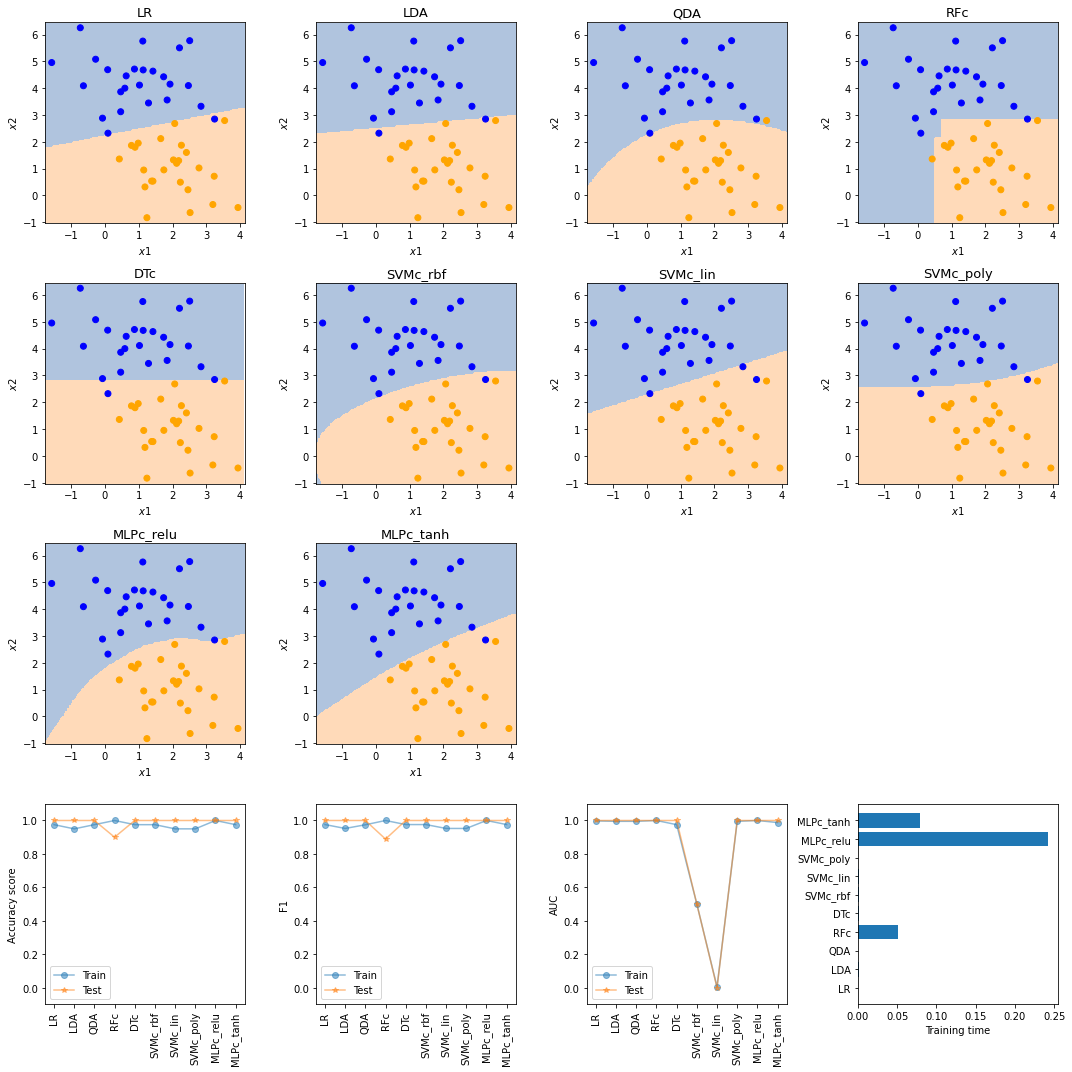

In [7]:
x, y = make_blobs(n_samples=50, centers=2, n_features=2, 
                  cluster_std=1, random_state=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.003988981246948242s


LinearDiscriminantAnalysis()
Training time: 0.0009970664978027344s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=10, random_state=42)
Training time: 0.11269831657409668s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=1)
Training time: 0.0009970664978027344s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.02695608139038086s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.019947052001953125s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.05, kernel='poly', probability=True)
Training time: 0.02892279624938965s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(batch_size=50)
Trainin

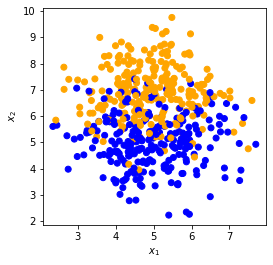

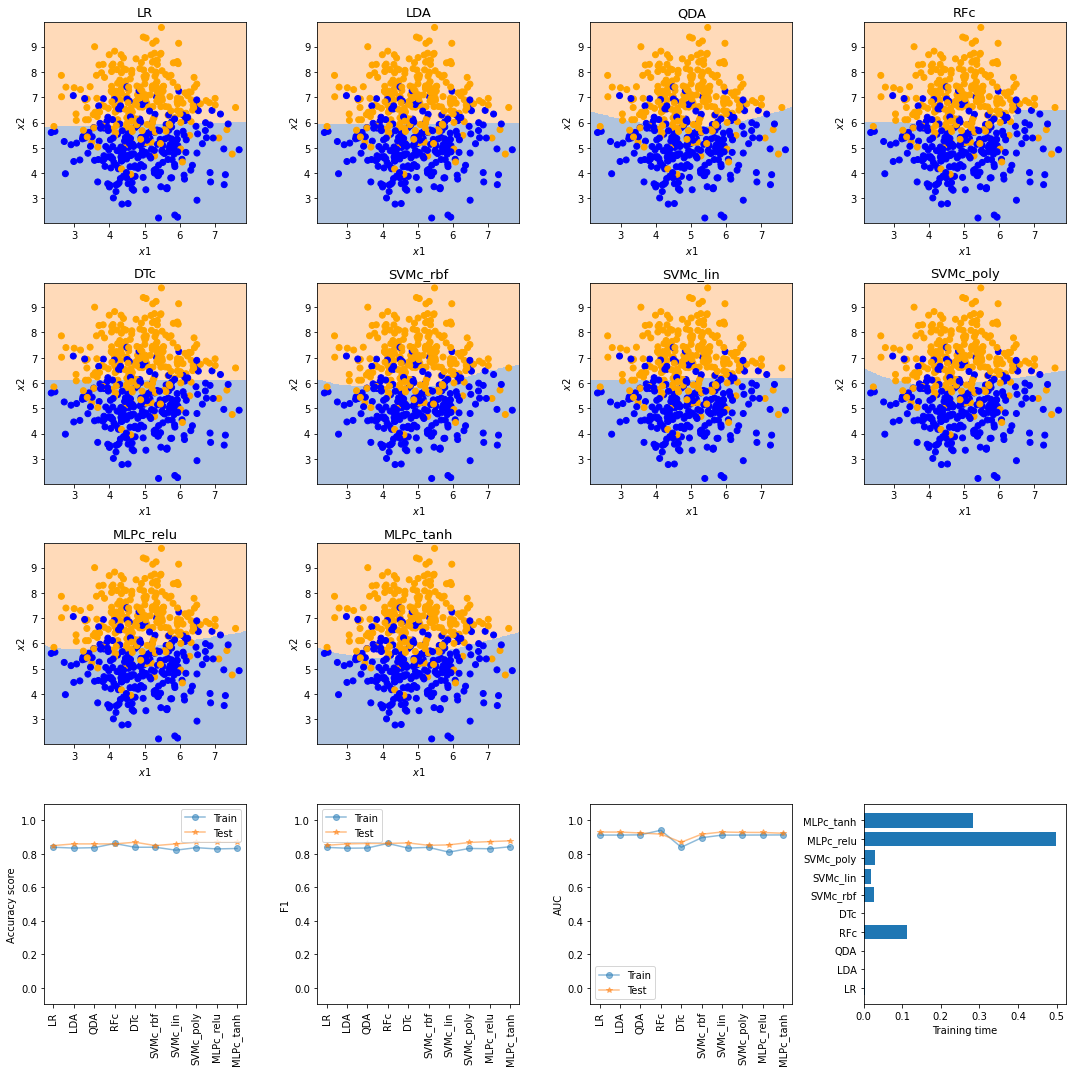

In [12]:
# Intersected: hard-ish
x,y = make_blobs(n_samples=500, n_features=2,
                centers=[(5,5), (5,7)], cluster_std=[1,1],
                random_state=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.003958702087402344s


LinearDiscriminantAnalysis()
Training time: 0.0s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=20, random_state=42)
Training time: 0.11269402503967285s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=9)
Training time: 0.0009970664978027344s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.05, probability=True)
Training time: 0.031946659088134766s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, kernel='linear', probability=True)
Training time: 0.021942138671875s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, kernel='poly', probability=True)
Training

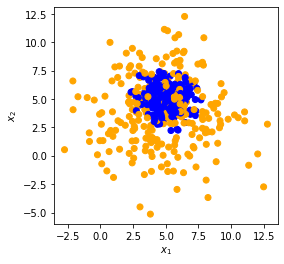

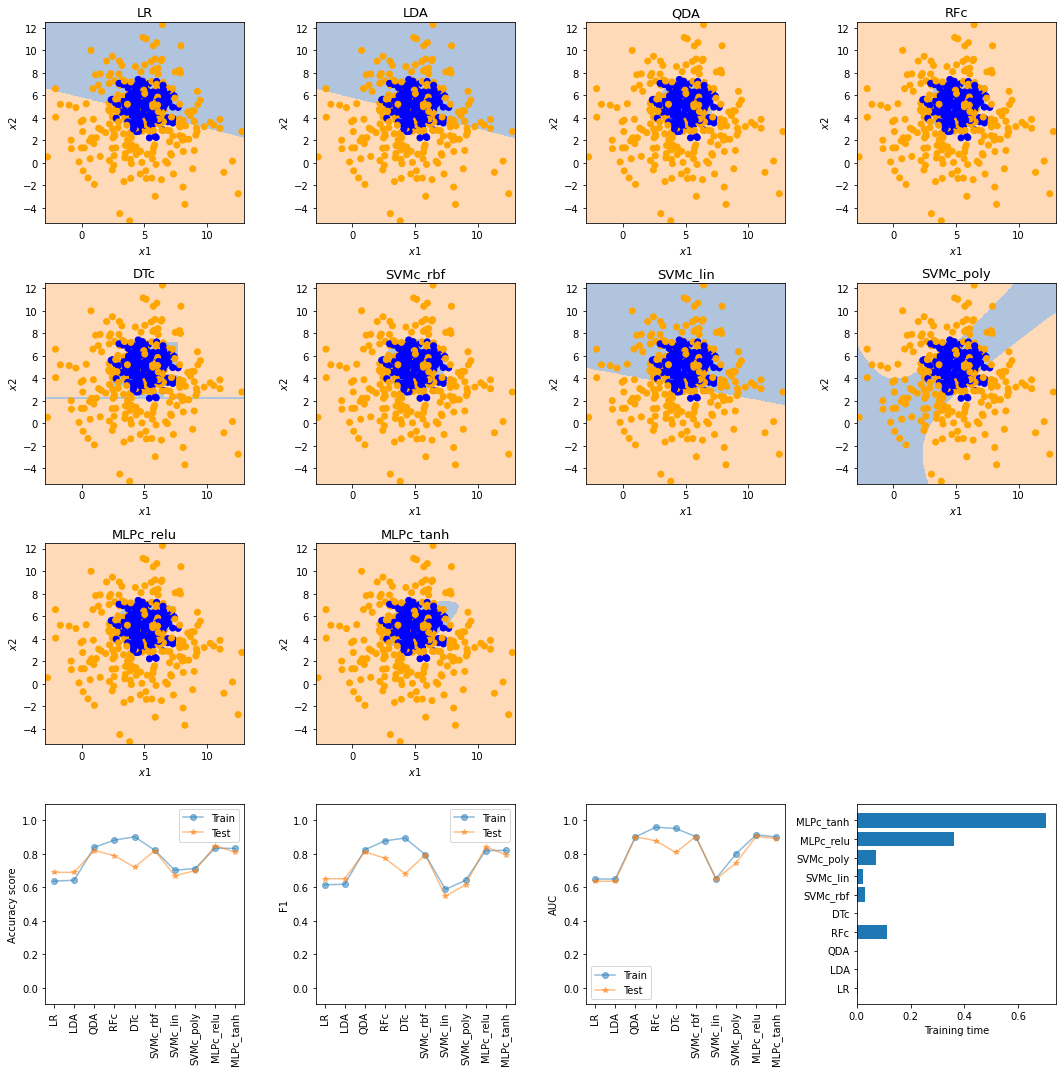

In [13]:
# Intersected: hard
x,y = make_blobs(n_samples=500, n_features=2,
                centers=[(5,5), (5,4)], cluster_std=[1,3],
                random_state=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.001995563507080078s


LinearDiscriminantAnalysis()
Training time: 0.0009980201721191406s


QuadraticDiscriminantAnalysis()
Training time: 0.0009968280792236328s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)
Training time: 0.28327369689941406s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=5)
Training time: 0.0019943714141845703s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.07380223274230957s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.08081221580505371s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='poly', probability=True)
Training time: 0.09773874282836914s


Fitting 5 folds for ea

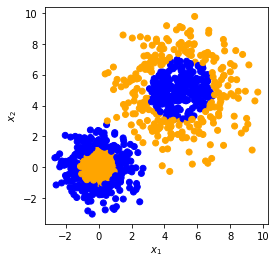

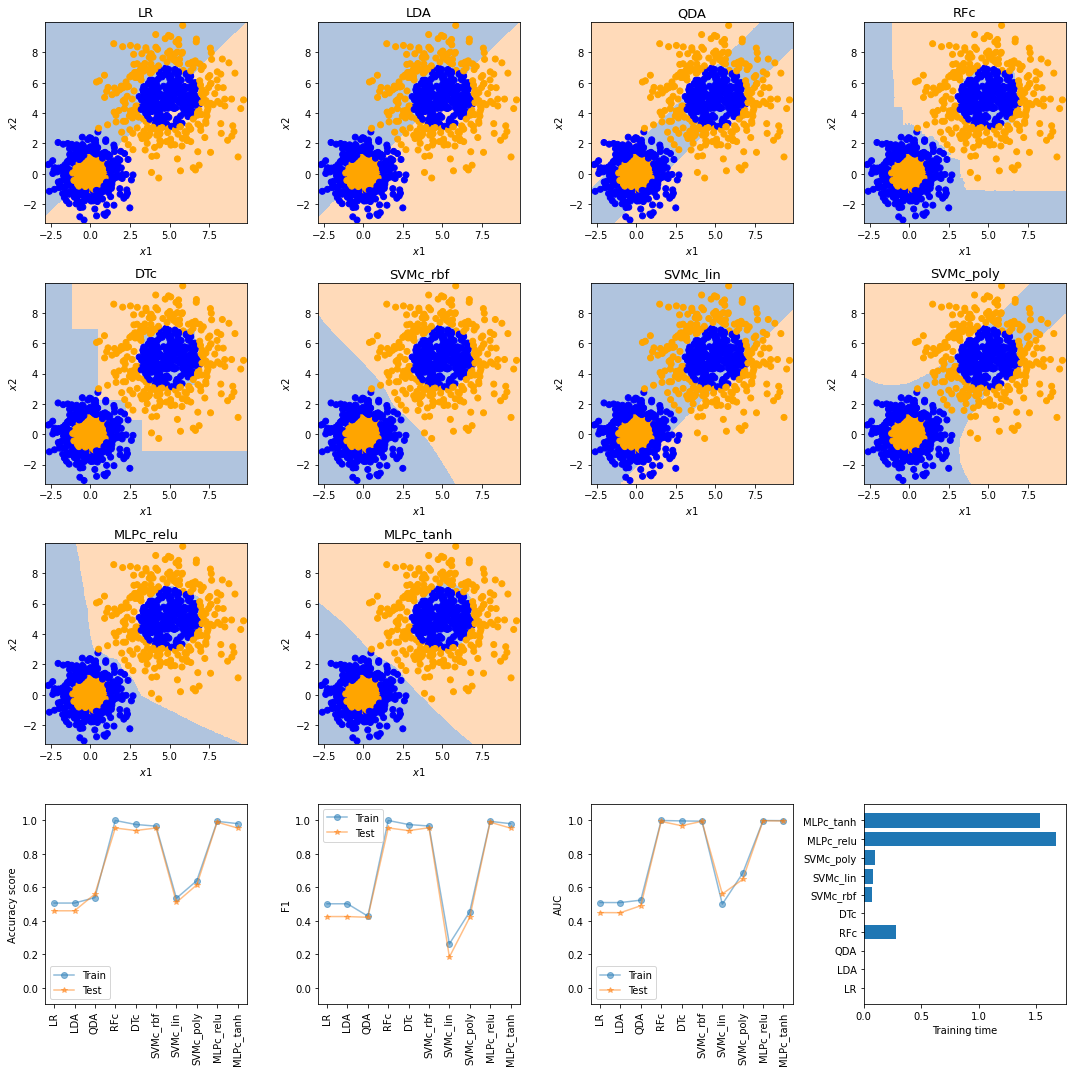

In [11]:
# Cluster 1
X1, y1 = make_gaussian_quantiles(cov=1.,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=0)

# Cluster 2
X2, y2 = make_gaussian_quantiles(mean=(5,5), cov=3.,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=0)


x=np.concatenate((X1,X2), axis=0)
y=np.concatenate((-y1+1,y2),axis=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.001994609832763672s


LinearDiscriminantAnalysis()
Training time: 0.0009982585906982422s


QuadraticDiscriminantAnalysis()
Training time: 0.0009980201721191406s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(n_estimators=10, random_state=42)
Training time: 0.010970830917358398s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=8)
Training time: 0.000997304916381836s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.002991914749145508s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.0009617805480957031s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.1, kernel='poly', probability=True)
Training time: 0.000997781753540039s


Fitting 5 folds for each of 72 candidate

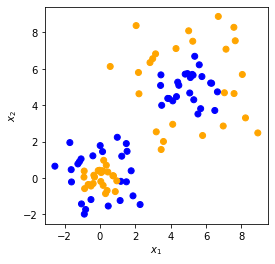

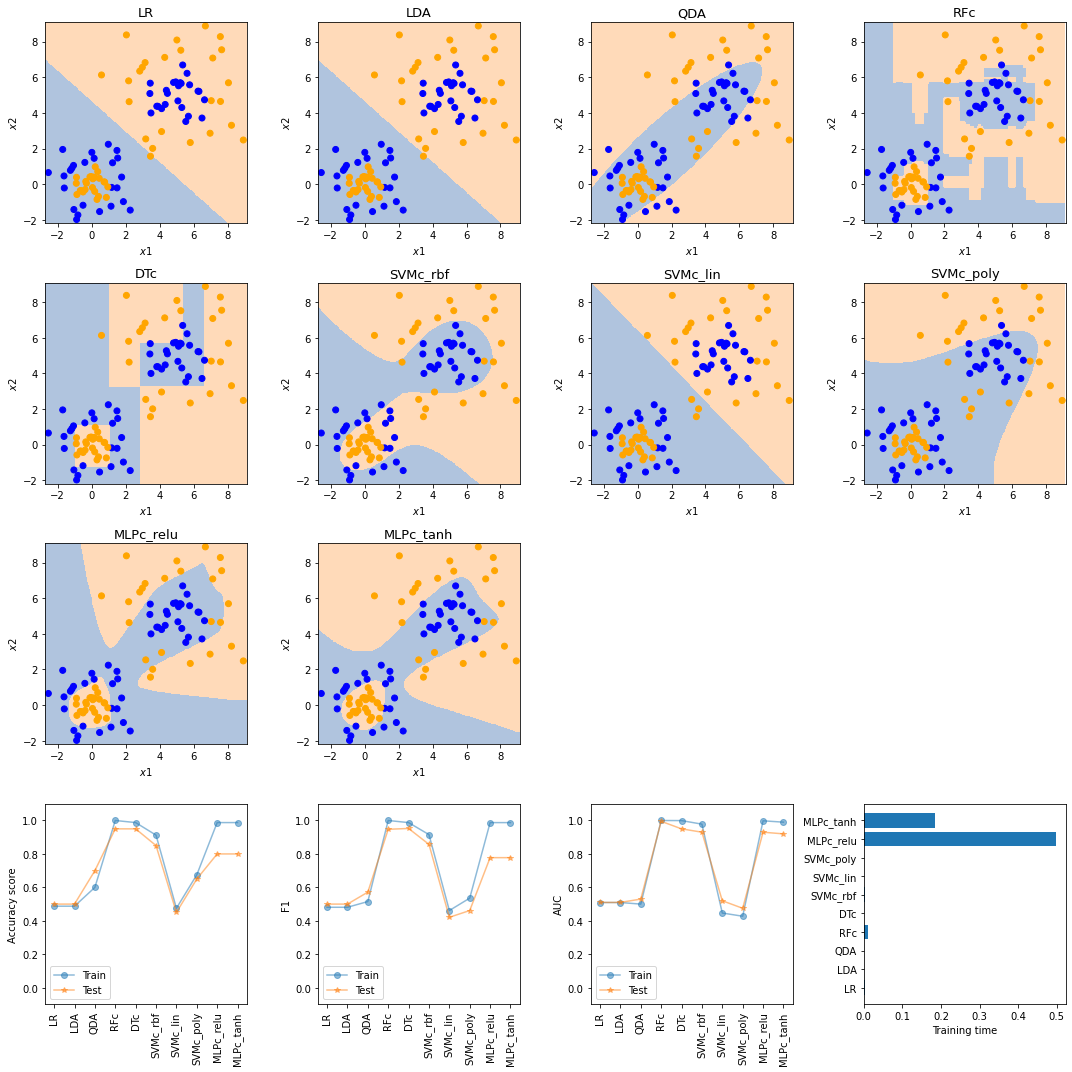

In [10]:
# Cluster 1
X1, y1 = make_gaussian_quantiles(cov=1.,
                                 n_samples=50, n_features=2,
                                 n_classes=2, random_state=0)

# Cluster 2
X2, y2 = make_gaussian_quantiles(mean=(5,5), cov=3.,
                                 n_samples=50, n_features=2,
                                 n_classes=2, random_state=0)


x=np.concatenate((X1,X2), axis=0)
y=np.concatenate((-y1+1,y2),axis=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

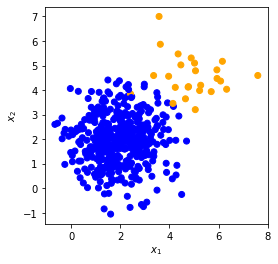

In [33]:
# Separated, unbalanced 5%
x,y = make_blobs(n_samples=[425,25], n_features=2,
                centers=[(2,2), (5,5)], cluster_std=[1,1],
                random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

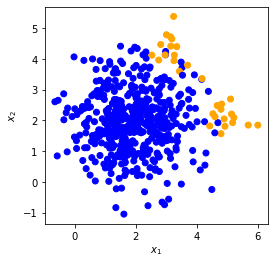

In [34]:
# Separated, unbalanced 5%: distal subclusters
x,y = make_blobs(n_samples=[470,15,15], n_features=2,
                centers=[(2,2), (3,4), (5,2)], cluster_std=[1,0.5,0.5],
                random_state=0)
for i in range(len(y)):
    if y[i]==2: y[i]=1
        
        
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

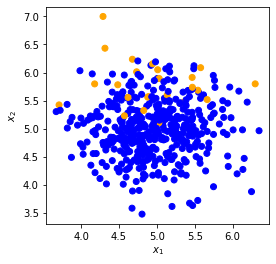

In [35]:
# Intersected, unbalanced 5%
x,y = make_blobs(n_samples=[425,25], n_features=2,
                centers=[(5,5), (5,6)], cluster_std=[0.5,0.5],
                random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

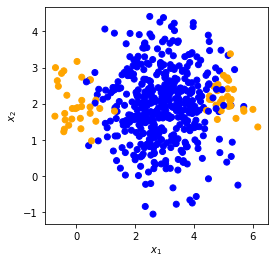

In [36]:
# Intersected, unbalanced 5%: subclusters
x,y = make_blobs(n_samples=[440,30,30], n_features=2,
                centers=[(3,2), (0,2), (5,2)], cluster_std=[1,0.5,0.5],
                random_state=0)
for i in range(len(y)):
    if y[i]==2: y[i]=1
        
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

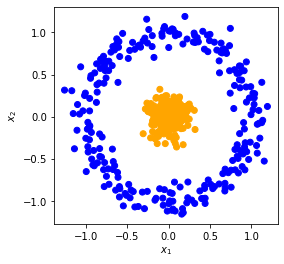

In [18]:
# Well Separated, balanced Circles: noisy
x,y = make_circles(n_samples=500, noise=0.1,
                     factor=0.1, random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

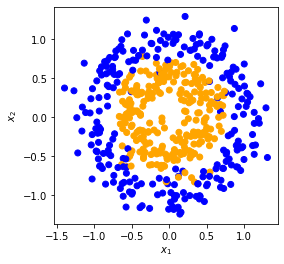

In [29]:
# Well Separated-ish, balanced Circles: noisy
x,y = make_circles(n_samples=500, noise=0.15,
                     factor=0.5, random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

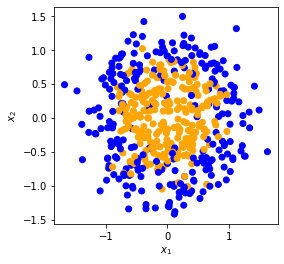

In [28]:
# Poorly Separated, balanced Circles: noisy
x,y = make_circles(n_samples=500, noise=0.25,
                     factor=0.5, random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

### make_moons

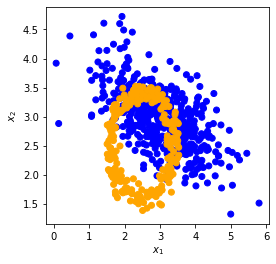

In [9]:
X1,y1 = make_classification(n_classes=1,n_samples=500, n_features=2, class_sep=3,
                          n_informative=2, n_redundant=0,
                          n_repeated=0, n_clusters_per_class=1,
                          flip_y=0.1, weights=[1],random_state=1)

X2,y2 = make_circles(n_samples=500, factor=0.9,noise=0.1, random_state=0)

X2_0 = X2[np.where(y2==1)]+2.5
y2_0 = y2[np.where(y2==1)]

x = np.concatenate((X1,X2_0),axis=0)
y = np.concatenate((y1,y2_0),axis=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

# Test_models(x, y)

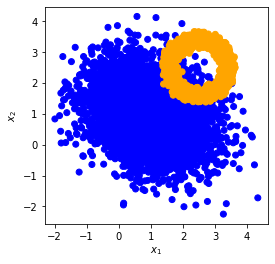

In [17]:
X1,y1 = make_classification(n_classes=1,n_samples=5000, n_features=2, class_sep=1,
                          n_informative=2, n_redundant=0,
                          n_repeated=0, n_clusters_per_class=1,
                          flip_y=0.1, weights=[1],random_state=1)

X2,y2 = make_circles(n_samples=5000, factor=0.9,noise=0.1, random_state=0)

X2_0 = X2[np.where(y2==1)]+2.5
y2_0 = y2[np.where(y2==1)]

x = np.concatenate((X1,X2_0),axis=0)
y = np.concatenate((y1,y2_0),axis=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

# Test_models(x, y)

LogisticRegression()
Training time: 0.0029892921447753906s


LinearDiscriminantAnalysis()
Training time: 0.0009975433349609375s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)
Training time: 0.20766496658325195s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=3)
Training time: 0.000997781753540039s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.015957117080688477s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, kernel='linear', probability=True)
Training time: 0.010970354080200195s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='poly', probability=True)
Training time: 0.021941423416137695s


Fitting 5 folds for each of 72 candidates, t

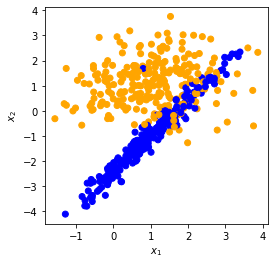

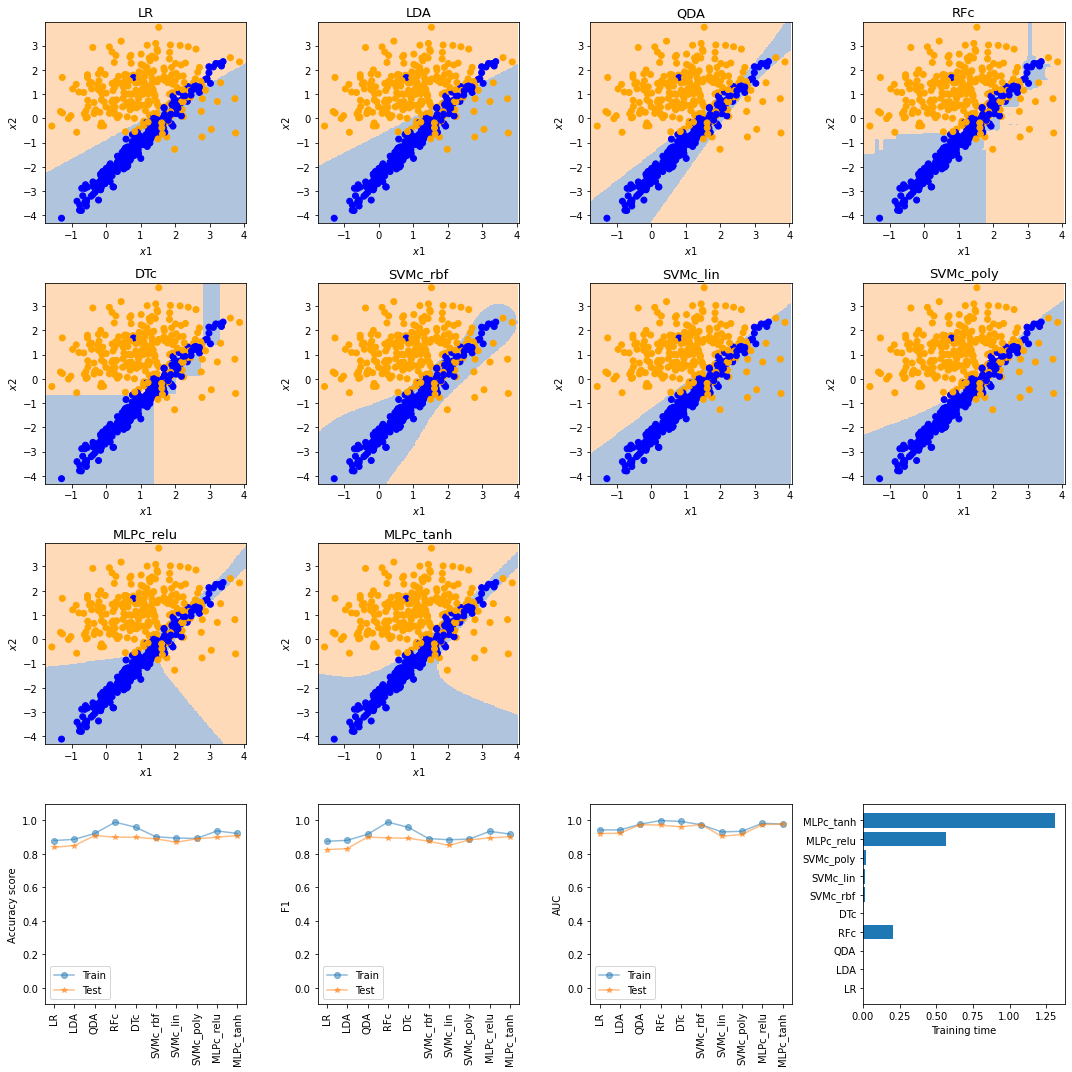

In [8]:
x,y = make_classification(n_samples=500,n_features=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          n_redundant=0,class_sep=1,
                          random_state=0,weights=(0.5,))
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.003956794738769531s


LinearDiscriminantAnalysis()
Training time: 0.0009965896606445312s


QuadraticDiscriminantAnalysis()
Training time: 0.0009970664978027344s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)
Training time: 0.2204122543334961s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)
Training time: 0.000997304916381836s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, probability=True)
Training time: 0.006981372833251953s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, kernel='linear', probability=True)
Training time: 0.006981372833251953s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='poly', probability=True)
Training time: 0.009973287582397461s


Fitting 5 folds for each of 7

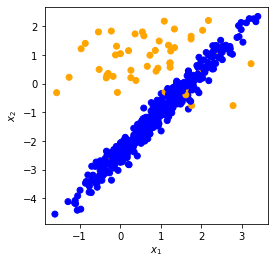

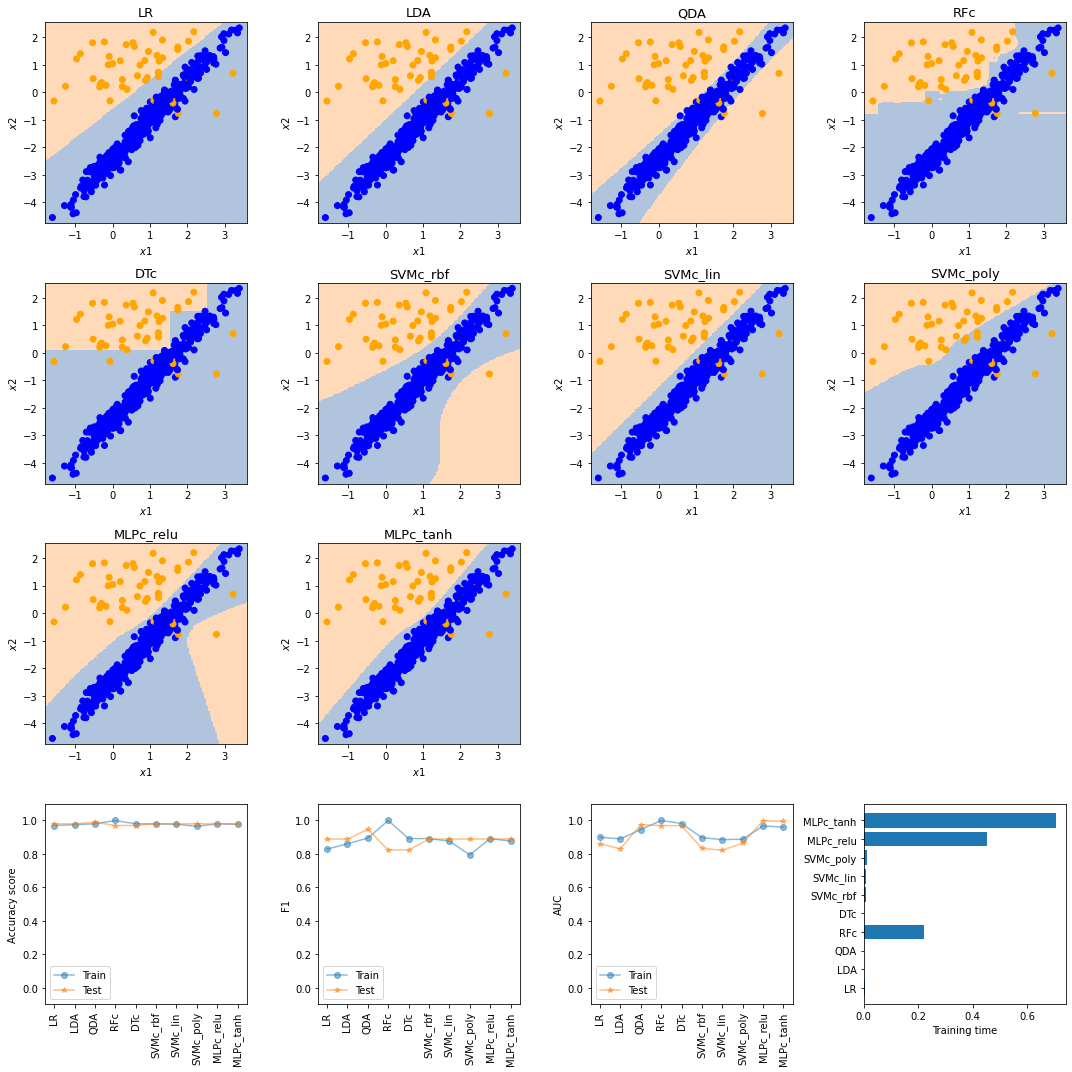

In [9]:
x,y = make_classification(n_samples=500,n_features=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          n_redundant=0,class_sep=1,
                          random_state=0,weights=(0.9,))
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

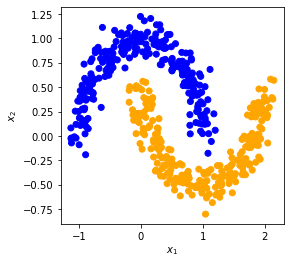

In [30]:
# Well Separated, balanced moons: noisy
x,y = make_moons(n_samples=500, noise=0.1,
                     random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

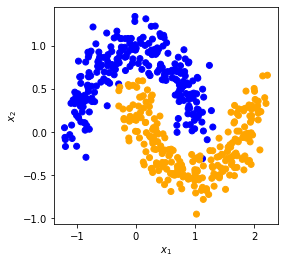

In [31]:
# Well Separated-ish, balanced moons: noisy
x,y = make_moons(n_samples=500, noise=0.15,
                     random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

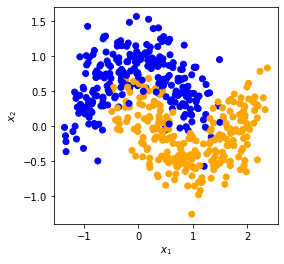

In [32]:
# Poorly Separated, balanced moons: noisy
x,y = make_moons(n_samples=500, noise=0.25,
                    random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
# Test_models(x, y)

LogisticRegression()
Training time: 0.004961252212524414s


LinearDiscriminantAnalysis()
Training time: 0.0009975433349609375s


QuadraticDiscriminantAnalysis()
Training time: 0.0009970664978027344s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=10, random_state=42)
Training time: 0.014959096908569336s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=9, min_samples_split=7)
Training time: 0.0009970664978027344s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.15857577323913574s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='linear', probability=True)
Training time: 17.737682819366455s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='poly', probability=True)
Training time: 0.1376

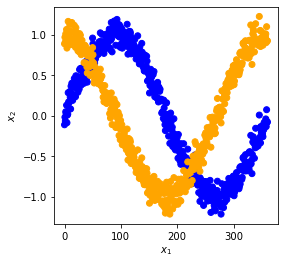

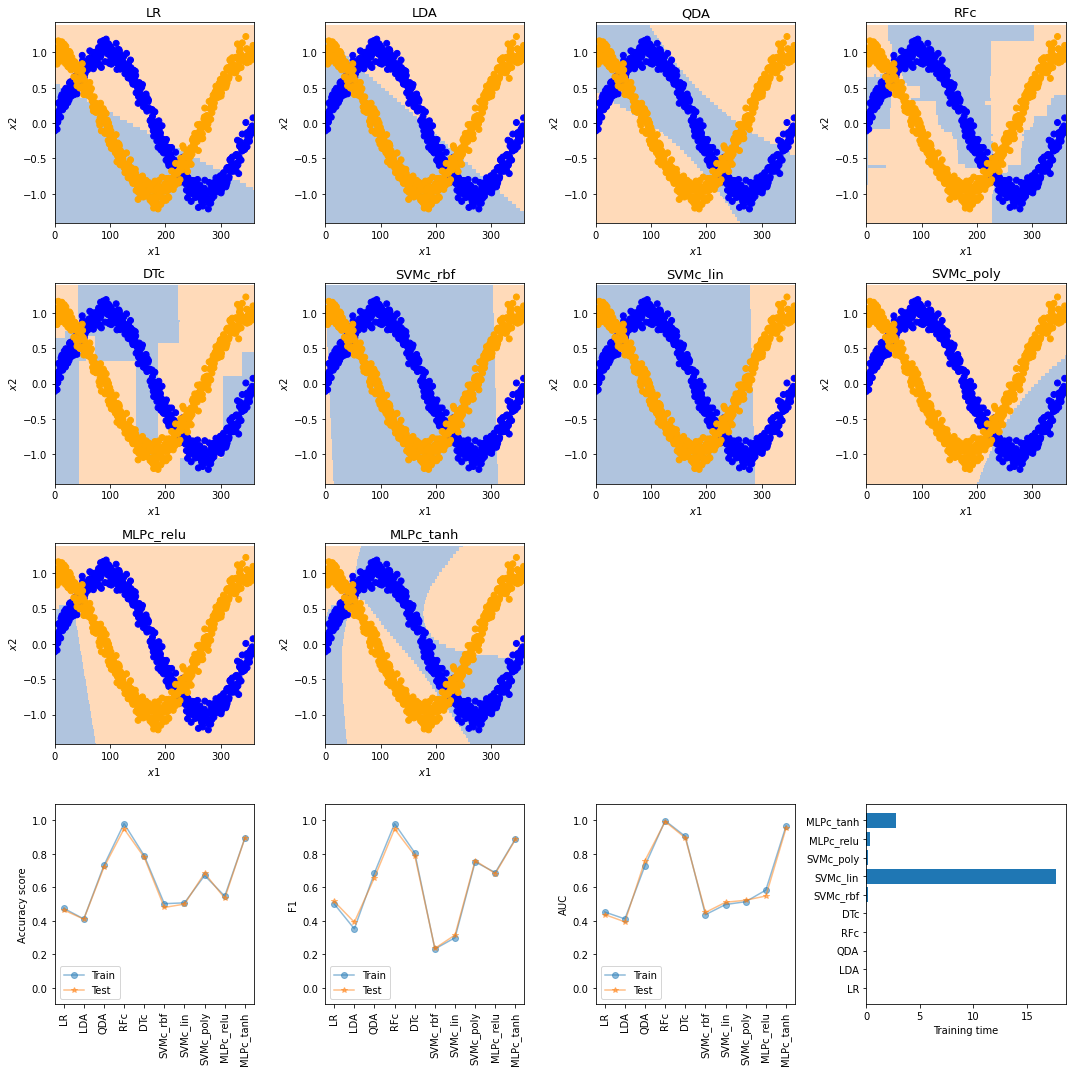

In [19]:
random_state = np.random.RandomState(seed=0)
noise=np.random.standard_normal(size=(500))/10
# Sine
x1 = np.linspace(0,12, 500)*30; y1 = np.sin(np.radians(x1))+noise; 
#Cosine
x2 = np.linspace(0,12, 500)*30; y2 = np.cos(np.radians(x2))+noise;

X1=np.concatenate((x1,x2),axis=0)
X2=np.concatenate((y1,y2), axis=0)

# Feature matrix and target array
x=np.c_[X1,X2]
y=np.array([0]*500 + [1]*500)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.004988670349121094s


LinearDiscriminantAnalysis()
Training time: 0.000997304916381836s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)
Training time: 0.18753576278686523s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=9, min_samples_split=3)
Training time: 0.0s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.0019948482513427734s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, kernel='linear', probability=True)
Training time: 0.006981372833251953s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='poly', probability=True)
Training time: 0.0029921531677246094s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(b

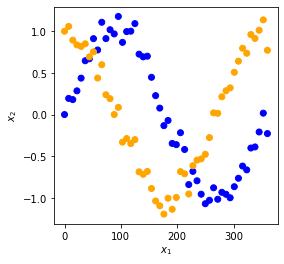

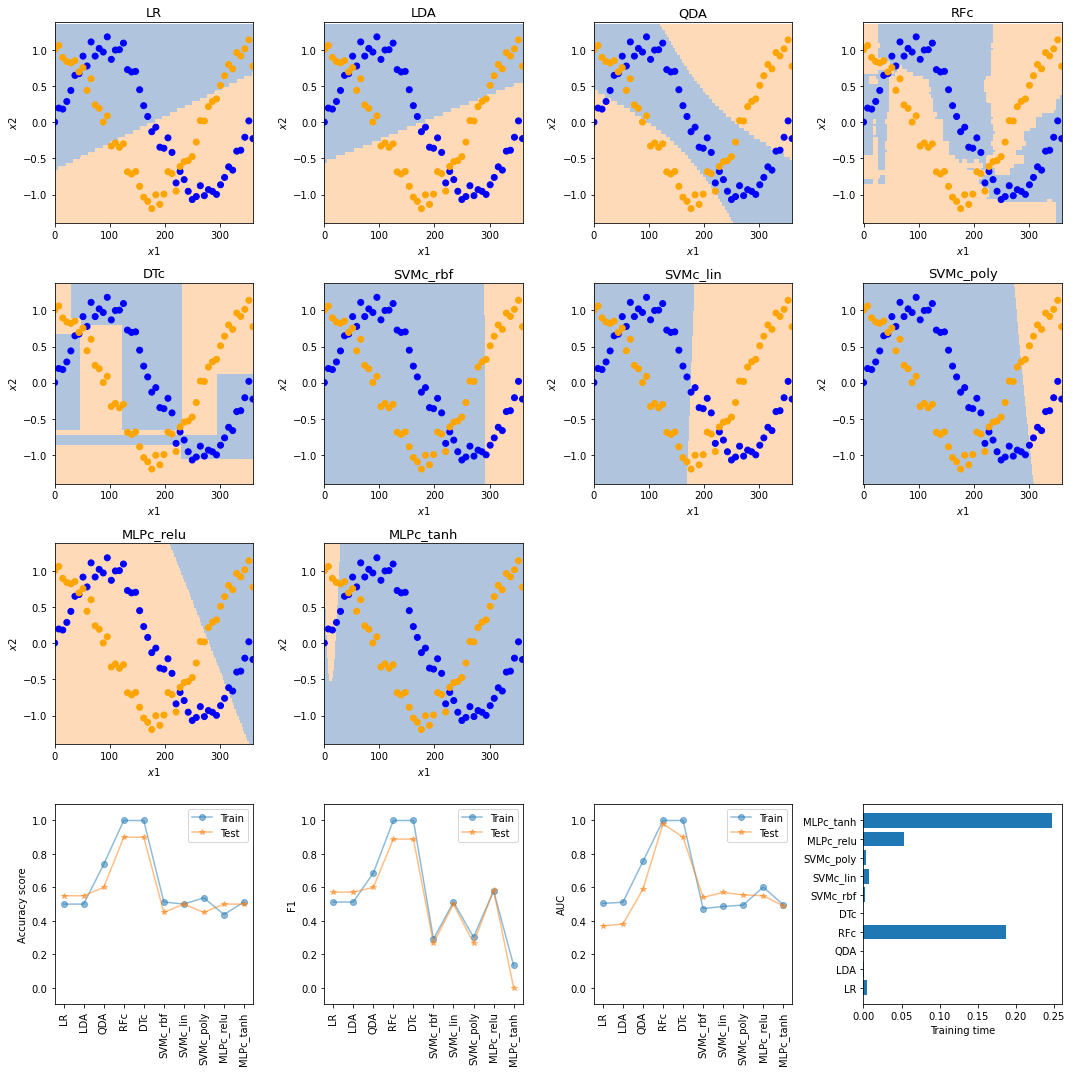

In [20]:
random_state = np.random.RandomState(seed=0)
noise=np.random.standard_normal(size=(50))/10
# Sine
x1 = np.linspace(0,12, 50)*30; y1 = np.sin(np.radians(x1))+noise; 
#Cosine
x2 = np.linspace(0,12, 50)*30; y2 = np.cos(np.radians(x2))+noise;

X1=np.concatenate((x1,x2),axis=0)
X2=np.concatenate((y1,y2), axis=0)

# Feature matrix and target array
x=np.c_[X1,X2]
y=np.array([0]*50 + [1]*50)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.0029921531677246094s


LinearDiscriminantAnalysis()
Training time: 0.000997304916381836s


QuadraticDiscriminantAnalysis()
Training time: 0.000997304916381836s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=2, min_samples_split=20,
                       n_estimators=50, random_state=42)
Training time: 0.12663006782531738s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=9, min_samples_split=6)
Training time: 0.003989696502685547s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.1, probability=True)
Training time: 2.634148359298706s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, kernel='linear', probability=True)
Training time: 21.892886877059937s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='poly', probability=True)
Training time: 2.544196367263794s


Fitting 5 fo

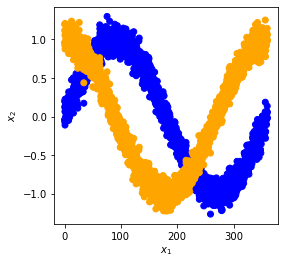

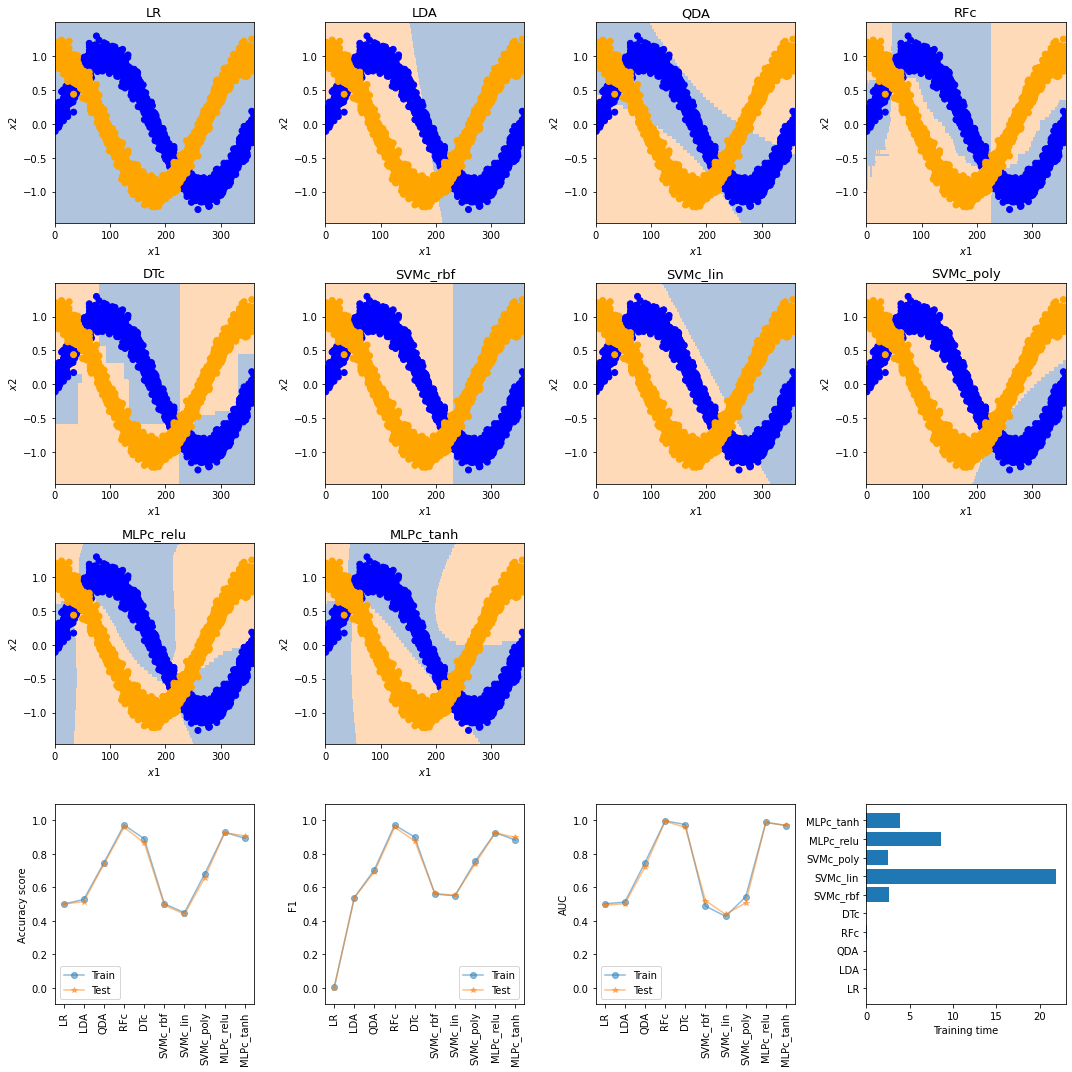

In [21]:
random_state = np.random.RandomState(seed=0)
noise=np.random.standard_normal(size=(2000))/10
# Sine
x1 = np.linspace(0,12, 2000)*30; y1 = np.sin(np.radians(x1))+noise; 
#Cosine
x2 = np.linspace(0,12, 2000)*30; y2 = np.cos(np.radians(x2))+noise;

X1=np.concatenate((x1,x2),axis=0)
X2=np.concatenate((y1,y2), axis=0)

# Feature matrix and target array
x=np.c_[X1,X2]
y=np.array([0]*2000 + [1]*2000)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

In [22]:
'''
# Separated, unbalanced 5%
X1,y1 = make_blobs(n_samples=[425,25], n_features=2,
                centers=[(2,2), (5,5)], cluster_std=[1,1],
                random_state=0)

# Separated, unbalanced 5%: distal subclusters
X4,y4 = make_blobs(n_samples=[470,15,15], n_features=2,
                centers=[(2,2), (3,4), (5,2)], cluster_std=[1,0.5,0.5],
                random_state=0)
for i in range(len(y4)):
    if y4[i]==2: y4[i]=1
        
# Intersected, unbalanced 5%
X5,y5 = make_blobs(n_samples=[425,25], n_features=2,
                centers=[(5,5), (5,6)], cluster_std=[0.5,0.5],
                random_state=0)

# Intersected, unbalanced 5%: subclusters
X6,y6 = make_blobs(n_samples=[440,30,30], n_features=2,
                centers=[(3,2), (0,2), (5,2)], cluster_std=[1,0.5,0.5],
                random_state=0)
for i in range(len(y6)):
    if y6[i]==2: y6[i]=1

for x,y in ((X1,y1),(X4,y4),(X5,y5),(X6,y6)):
    fig = plt.figure(figsize=(3,2))
    ax=plt.axes()
    ax.scatter(x[:,0],x[:,1],color=cmap(y))
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$');
'''    

"\n# Separated, unbalanced 5%\nX1,y1 = make_blobs(n_samples=[425,25], n_features=2,\n                centers=[(2,2), (5,5)], cluster_std=[1,1],\n                random_state=0)\n\n# Separated, unbalanced 5%: distal subclusters\nX4,y4 = make_blobs(n_samples=[470,15,15], n_features=2,\n                centers=[(2,2), (3,4), (5,2)], cluster_std=[1,0.5,0.5],\n                random_state=0)\nfor i in range(len(y4)):\n    if y4[i]==2: y4[i]=1\n        \n# Intersected, unbalanced 5%\nX5,y5 = make_blobs(n_samples=[425,25], n_features=2,\n                centers=[(5,5), (5,6)], cluster_std=[0.5,0.5],\n                random_state=0)\n\n# Intersected, unbalanced 5%: subclusters\nX6,y6 = make_blobs(n_samples=[440,30,30], n_features=2,\n                centers=[(3,2), (0,2), (5,2)], cluster_std=[1,0.5,0.5],\n                random_state=0)\nfor i in range(len(y6)):\n    if y6[i]==2: y6[i]=1\n\nfor x,y in ((X1,y1),(X4,y4),(X5,y5),(X6,y6)):\n    fig = plt.figure(figsize=(3,2))\n    ax=plt.axes()\n 